In [1]:
from urllib.request import urlretrieve

url1 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'
urlretrieve(url1, './data/green_tripdata_2024-01.parquet')
url2 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'
urlretrieve(url2, './data/green_tripdata_2024-02.parquet')

('./data/green_tripdata_2024-02.parquet',
 <http.client.HTTPMessage at 0x77bb08301700>)

Feature's information = https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

In [2]:
import pandas as pd

In [8]:
train = pd.read_parquet('./data/green_tripdata_2024-01.parquet')
test = pd.read_parquet('./data/green_tripdata_2024-02.parquet')

In [9]:
train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

Features to use:
- Trip_distance
- PULocationID
- DOLocationID
- RateCodeID
- lpep_pickup_datetime
- lpep_dropoff_datetime
- Passenger_count
- Trip_type

Target variable: Duration -> subtracting the lpep_pickup_datetime from lpep_dropoff_datetime.

In [14]:
train['duration'] = ((train['lpep_dropoff_datetime'] - train['lpep_pickup_datetime']).dt.total_seconds() / 60).round(1) # duration in minutes rounded to 1 decimal place
test['duration'] = ((test['lpep_dropoff_datetime'] - test['lpep_pickup_datetime']).dt.total_seconds() / 60).round(1)

In [15]:
train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.5
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.9
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.0
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.9
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,11.0


In [33]:
df_train = train[['trip_distance', 'PULocationID', 'DOLocationID', 'RatecodeID', 'passenger_count', 'trip_type', 'duration']]
df_test = test[['trip_distance', 'PULocationID', 'DOLocationID', 'RatecodeID', 'passenger_count', 'trip_type', 'duration']]

, 'tip_amount', 'tolls_amount', 'fare_amount', 'total_amount'

In [34]:
numerical_columns = df_train.select_dtypes(include='number').columns

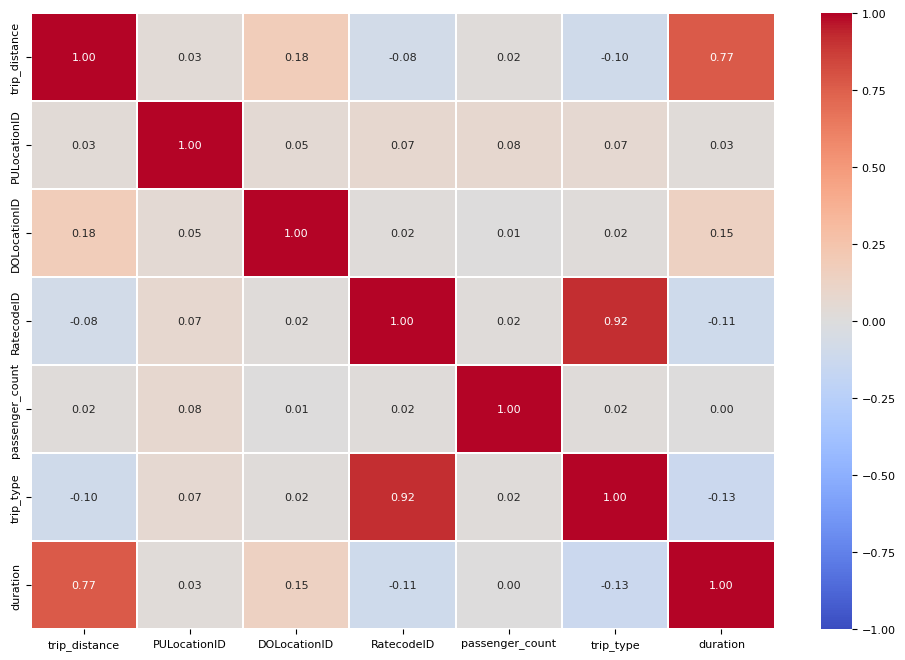

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlation matrix
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(df_train[numerical_columns].corr(method = 'spearman'), 
                 cmap = 'coolwarm', annot = True, fmt = '.2f', 
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

In [37]:
df_train.isna().sum()

trip_distance         0
PULocationID          0
DOLocationID          0
RatecodeID         3415
passenger_count    3415
trip_type          3418
duration              0
dtype: int64

In [38]:
df_test.isna().sum()

trip_distance         0
PULocationID          0
DOLocationID          0
RatecodeID         3415
passenger_count    3415
trip_type          3418
duration              0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_train[['RatecodeID', 'passenger_count', 'trip_type']] = mean_imputer.fit_transform(df_train[['RatecodeID', 'passenger_count', 'trip_type']])

/tmp/ipykernel_6723/644229505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['RatecodeID', 'passenger_count', 'trip_type']] = mean_imputer.fit_transform(df_train[['RatecodeID', 'passenger_count', 'trip_type']])


In [42]:
df_test[['RatecodeID', 'passenger_count', 'trip_type']] = mean_imputer.fit_transform(df_test[['RatecodeID', 'passenger_count', 'trip_type']])

/tmp/ipykernel_6723/2410905386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['RatecodeID', 'passenger_count', 'trip_type']] = mean_imputer.fit_transform(df_test[['RatecodeID', 'passenger_count', 'trip_type']])


In [43]:
df_train.isna().sum()

trip_distance      0
PULocationID       0
DOLocationID       0
RatecodeID         0
passenger_count    0
trip_type          0
duration           0
dtype: int64

In [44]:
df_test.isna().sum()

trip_distance      0
PULocationID       0
DOLocationID       0
RatecodeID         0
passenger_count    0
trip_type          0
duration           0
dtype: int64

In [45]:
X_train = df_train.drop('duration', axis=1)
y_train = df_train['duration']
X_test = df_test.drop('duration', axis=1)
y_test = df_test['duration']

In [47]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 6.24234382169063, RMSE: 45.790461853139774
